## This should create a Phenotyp Phase Plane (PhPP) for iMT1026v3 and iYali4
- Intervall of Glucose uptake and Interval of Oxygen uptake and the growth is plottet as well => 3D plot

In [ ]:
# Pseudocode:
glucose_rxn = "glu"
oxygen_rxn = "o2"
model = model 

growth_rates = np.zeros((100, 100))
glucose_range = np.linspace(0, 20, 100)
oxygen_range = np.linspace(0, 20, 100)

for i in glucose_range:
    for j in oxygen_range:
        model.reactions.get_by_id(glucose_rxn).bounds = (i, i)
        model.reactions.get_by_id(oxygen_rxn).bounds = (j, j)
        growth_rates[i,j] = model.slim_optimize()

In [2]:
# imports
import cobra
import numpy as np
import matplotlib.pyplot as plt
import sys # append path
from cobra.flux_analysis import pfba # parsimonious FBA

sys.path.append('../scripts/')
import helperFunction as hf

config = hf.load_config()

### iMT1026v3

In [3]:
# load model
iMT1026v3_model = cobra.io.read_sbml_model(config['models']['ppa1026v3'])
o2_ex_rxn = 'Ex_o2' # O2
glu_ex_rxn = 'Ex_glc_D' # glucose
biomass_rxn = 'Ex_biomass'


In [14]:
iMT1026v3_model.reactions.get_by_id(o2_ex_rxn) # o2_e <--
# iMT1026v3_model.reactions.get_by_id(glu_ex_rxn) # glc_D_e -->

Reaction identifier,Ex_o2
Name,Oxygen exchange
Memory address,0x2a1707fd0
Stoichiometry,o2_e <-- Oxygen <--
GPR,
Lower bound,-1000.0
Upper bound,0.0


In [43]:
iMT1026v3_model.summary()
# shut glycerol uptake off 
iMT1026v3_model.reactions.get_by_id('Ex_glyc').bounds = (0, 0)
# test growth again
try: 
    iMT1026v3_model.summary()
except:
    print('no growth')

no growth


In [10]:
# minimal glucose or oxygen concentration;
val = 0.0001
iMT1026v3_model.reactions.get_by_id(glu_ex_rxn).bounds = (-val, -val)
oxy_val = 10
iMT1026v3_model.reactions.get_by_id(o2_ex_rxn).bounds = (-oxy_val, oxy_val)
iMT1026v3_model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc_D_e,Ex_glc_D,0.0001,6,0.02%
glyc_e,Ex_glyc,1,3,99.98%
nh4_e,Ex_nh4,0.3583,0,0.00%
o2_e,Ex_o2,1.45,0,0.00%
pi_e,Ex_pi,0.01453,0,0.00%
so4_e,Ex_so4,0.002533,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
biomass_e,Ex_biomass,-0.05776,0,0.00%
co2_e,Ex_co2,-0.9783,1,100.00%
h_e,Ex_h,-0.3755,0,0.00%


In [87]:
# max glucose or oxygen concentration;
val = 5
iMT1026v3_model.reactions.get_by_id(glu_ex_rxn).bounds = (-val, -val)
oxy_val = 10
iMT1026v3_model.reactions.get_by_id(o2_ex_rxn).bounds = (-oxy_val, oxy_val)
iMT1026v3_model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
btn_e,Ex_btn,5.846E-07,10,0.00%
fe2_e,Ex_fe2,5.846E-07,0,0.00%
glc_D_e,Ex_glc_D,5,6,100.00%
nh4_e,Ex_nh4,3.626,0,0.00%
o2_e,Ex_o2,9.249,0,0.00%
pi_e,Ex_pi,0.1471,0,0.00%
so4_e,Ex_so4,0.02564,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
biomass_e,Ex_biomass,-0.5846,0,0.00%
co2_e,Ex_co2,-9.533,1,100.00%


In [147]:
_verbose = True
glucose_rxn = o2_ex_rxn
oxygen_rxn = glu_ex_rxn
iMT1026v3_model = iMT1026v3_model 
biomass_rxn = biomass_rxn
min_glu = 0.1
max_glu = 5 # just test for glucose 5 mmol (if set to this value 9.5 mmol o2 are required)
min_oxy = 0.38
max_oxy = 10
number_computations = 3

growth_rates = np.zeros((number_computations, number_computations))
glucose_range = np.linspace(min_glu, max_glu, number_computations)
oxygen_range = np.linspace(min_oxy, max_oxy, number_computations)

for i in range(len(glucose_range)):
    growth_rates_list = []
    for j in range(len(oxygen_range)):
        iMT1026v3_model.reactions.get_by_id(glucose_rxn).bounds = (-glucose_range[i], -glucose_range[i])
        iMT1026v3_model.reactions.get_by_id(oxygen_rxn).bounds = (-oxygen_range[j], oxygen_range[j])
        try:
            growth_rates_list.append(pfba(iMT1026v3_model).fluxes[biomass_rxn])
        except:
            growth_rates_list.append(0)
        if _verbose:
            print('glucose: {}, oxygen: {}, growth rate: {}'.format(glucose_range[i], oxygen_range[j], growth_rates_list[j]))
    growth_rates[i,:] = growth_rates_list
        

glucose: 0.1, oxygen: 0.38, growth rate: 0
glucose: 0.1, oxygen: 5.1899999999999995, growth rate: 0.07941274537596074
glucose: 0.1, oxygen: 10.0, growth rate: 0.17186340417185345
glucose: 2.5500000000000003, oxygen: 0.38, growth rate: 0
glucose: 2.5500000000000003, oxygen: 5.1899999999999995, growth rate: 0.22168668956875948
glucose: 2.5500000000000003, oxygen: 10.0, growth rate: 0.327105668988013
glucose: 5.0, oxygen: 0.38, growth rate: 0
glucose: 5.0, oxygen: 5.1899999999999995, growth rate: 0.3559260344633379
glucose: 5.0, oxygen: 10.0, growth rate: 0.461345013882591


In [149]:
plt.scatter(glucose_range,oxygen_range )

<IPython.core.display.Javascript object>

In [150]:
def comp_growth_rates(model, j, glucose_range, oxygen_range,  biomass_rxn):
    """Computes growth rates for a glucose value"""
    for j in range(len(oxygen_range)):
        iMT1026v3_model.reactions.get_by_id(glucose_rxn).bounds = (-glucose_range[i], -glucose_range[i])
        iMT1026v3_model.reactions.get_by_id(oxygen_rxn).bounds = (-oxygen_range[j], oxygen_range[j])
        try:
            growth_rates_list.append(pfba(iMT1026v3_model).fluxes[biomass_rxn])
        except:
            growth_rates_list.append(0)
        if _verbose:
            print('glucose: {}, oxygen: {}, growth rate: {}'.format(glucose_range[i], oxygen_range[j], growth_rates_list[j]))
    return growth_rates_list

list_growth = comp_growth_rates(iMT1026v3_model, 1, glucose_range, oxygen_range, biomass_rxn)
print(list_growth)

glucose: 5.0, oxygen: 0.38, growth rate: 0
glucose: 5.0, oxygen: 5.1899999999999995, growth rate: 0.3559260344633379
glucose: 5.0, oxygen: 10.0, growth rate: 0.461345013882591
[0, 0.3559260344633379, 0.461345013882591, 0, 0.3559260344633408, 0.4613450138825929]


In [93]:
# copy growth_rates to another matrix
growth_rates_copy = growth_rates.copy()

In [144]:
# np.save("20x20_glu_oxy_iMT1026v3_growth_rates", growth_rates)
growth_rates

array([[0.        , 0.        , 0.00422184, 0.0152635 , 0.02544039,
        0.03543643, 0.04535199, 0.05508362, 0.06481527, 0.07454692,
        0.08427857, 0.09401022, 0.10374187, 0.11347351, 0.12320516,
        0.13293681, 0.14266846, 0.15240011, 0.16213176, 0.1718634 ],
       [0.        , 0.00725556, 0.0183523 , 0.02944904, 0.04054577,
        0.05153065, 0.06221595, 0.07240032, 0.08239637, 0.09239241,
        0.10238846, 0.1123845 , 0.12238055, 0.13237659, 0.14237264,
        0.15235121, 0.16208286, 0.17181451, 0.18154616, 0.19127781],
       [0.01028928, 0.02138601, 0.03248275, 0.04357949, 0.05467622,
        0.06577295, 0.07686969, 0.08779782, 0.09858639, 0.10915336,
        0.11936026, 0.1293563 , 0.13935235, 0.14934839, 0.15934444,
        0.16934048, 0.17933653, 0.18933257, 0.19932862, 0.20932466],
       [0.02441974, 0.03551648, 0.04661321, 0.05770994, 0.06880668,
        0.        , 0.09100015, 0.10209688, 0.11319361, 0.12406498,
        0.1348643 , 0.14552683, 0.1560779 , 0

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# # data
# data = np.array([[5., 6., 7., 8.],
#                  [5., 6., 7., 8.],
#                  [5., 6., 7., 8.],
#                  [5., 6., 7., 8.]])

# # Define x and y axes
# x = np.linspace(0.1, 5, 4)
# y = np.linspace(0.38, 5, 4)

# Given data
data = growth_rates
x = glucose_range
y = oxygen_range

# Create a meshgrid from x and y
X, Y = np.meshgrid(x, y)
# X, Y = np.meshgrid(np.flip(x,0), y) # probably wrong (meshgrid understanding is missing)

# Create a 3D plot
fig = plt.figure()
# ax = plt.axes(projection='3d')
ax = fig.add_subplot(111, projection='3d')

# Set labels for x, y, and z axes
ax.set_xlabel('glucose uptake (mmol/gDW/h)')
ax.set_ylabel('oxygen uptake (mmol/gDW/h))')
ax.set_zlabel('Growth rate (1/h)')
ax.view_init(45, 215)

# Plot the data
ax.plot_surface(X, Y, data, cmap='viridis')



# Show the plot
plt.show()

<IPython.core.display.Javascript object>

In [153]:
# Given data
data = growth_rates
x = glucose_range
y = oxygen_range

# Create a meshgrid from x and y
X, Y = np.meshgrid(x, y)
# X, Y = np.meshgrid(np.flip(x,0), y) # probably wrong (meshgrid understanding is missing)

# Create a 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax = fig.add_subplot(111, projection='3d')

# Set labels for x, y, and z axes
ax.set_xlabel('glucose uptake (mmol/gDW/h)')
ax.set_ylabel('oxygen uptake (mmol/gDW/h))')
ax.set_zlabel('Growth rate (1/h)')
ax.view_init(45, 215)

# Plot the data
ax.plot_surface(X, Y, data, cmap='viridis');

<IPython.core.display.Javascript object>

### iLC915

In [216]:
# load model
iLC915_model = cobra.io.read_sbml_model(config['models']['ppaiLC915'])

glucose_rxn = 'r1145'
oxygen_rxn = 'r1160'

In [217]:
# prepare model
print('iLC915 model: ')

# prepare iLC915_model: needed because of internal cycles and active reactions
# lower and upper bounds of several reactions should be set to zero according to supplementary material of 
constraints_2_zero = ['r66','r910','r1104','r239','r111','r106','r490','r791','r243','r252','r253','r307','r308','r404','r405','r1320','r639','r640','r641','r642','r649','r650','r651','r652','r645','r646','r643','r644','r653','r654','r655','r656','r534'] 
for rxn_id in constraints_2_zero:
    rxn = iLC915_model.reactions.get_by_id(rxn_id)
    rxn.bounds = (0,0)
# constraint formulate uptake because of not meaningful results
formulate_uptake = iLC915_model.reactions.get_by_id('r1143')
formulate_uptake.bounds = (0,0)
# important carbon sources (biotin, CO2, urea)
important_carbon = ['r1132','r1137','r1177']

# all carbon containing exchange reactions
carbon_exchange_rxns = ['r1122', 'r1123', 'r1124', 'r1126', 'r1127', 'r1129', 'r1130', 'r1131', 'r1132', 'r1134', 'r1135', 'r1137', 'r1138', 'r1139', 'r1140', 'r1141', 'r1144', 'r1145', 'r1146', 'r1147', 'r1148', 'r1149', 'r1151', 'r1152', 'r1153', 'r1154', 'r1155', 'r1156', 'r1157', 'r1158', 'r1161', 'r1162', 'r1163', 'r1165', 'r1167', 'r1168', 'r1170', 'r1172', 'r1173', 'r1174', 'r1175', 'r1176', 'r1177', 'r1178']

# set all carbon exchange reactions to 0 except important ones
for rxn_id in carbon_exchange_rxns:
    if rxn_id not in important_carbon:
        rxn = iLC915_model.reactions.get_by_id(rxn_id)
        rxn.bounds = (0,0)

# check definition of important rxns 
important_rxns = ['r1133', 'r1141', 'r1145', 'r1144', 'r1148', 'r1160', 'r1137', 'r1188']

if _verbose: 
    for rxn_id in important_rxns:
        rxn = iLC915_model.reactions.get_by_id(rxn_id)
        print(rxn.reactants, rxn.products, rxn.bounds)
        print(rxn_id, rxn.name, hf.formulaWithNames(rxn), 'rxn coefficient: ', rxn.get_coefficient(list(rxn.metabolites.keys())[0]))



iLC915 model: 
[<Metabolite m1226 at 0x2a76a5040>] [] (0.0, 1000.0)
r1133 Drain of biomass Biomass_ -->  rxn coefficient:  -1.0
[<Metabolite m1218 at 0x2a76a5e80>] [] (0, 0)
r1141 Ethanol uptake or drain Ethanol_C2H6O -->  rxn coefficient:  -1.0
[] [<Metabolite m2 at 0x2a7688b20>] (0, 0)
r1145 Uptake of alpha-D-Glucose  --> alpha-D-Glucose_C6H12O6 rxn coefficient:  1.0
[] [<Metabolite m1334 at 0x2a76a8af0>] (0, 0)
r1144 Uptake of beta-D-Fructose  --> beta-D-Fructose_C6H12O6 rxn coefficient:  1.0
[] [<Metabolite m1238 at 0x2a76a8280>] (0, 0)
r1148 uptake of glycerol  --> Glycerol_C3H8O3 rxn coefficient:  1.0
[] [<Metabolite m1232 at 0x2a76a80d0>] (0.0, 1000.0)
r1160 uptake of O2  --> Oxygen_O2 rxn coefficient:  1.0
[<Metabolite m1244 at 0x2a76a83a0>] [] (0.0, 1000.0)
r1137 Drain of CO2 CO2_CO2 -->  rxn coefficient:  -1.0
[<Metabolite m1 at 0x2a76888b0>, <Metabolite m5 at 0x2a7688ac0>] [<Metabolite m3 at 0x2a7688970>, <Metabolite m7 at 0x2a7688c10>] (0.0, 1000.0)
r1188 Maintenance 2.26 A

In [222]:
iLC915_model.summary()

Infeasible: None (infeasible).

In [221]:
biomass_rxn = 'r1339' # growth
# set objective: 
iLC915_model.objective = biomass_rxn

# set maintenance reaction
maintenance = 'r1188'
maintenance_rxn = iLC915_model.reactions.get_by_id(maintenance)
# maintenance_rxn.bounds = (_ppa_maintenance,_ppa_maintenance)
# maintenance_rxn.bounds = (1,1) # according to iLC915
maintenance_rxn.bounds = (1.2434,1.2434) # according to iLC915 (1.2434 * 2.26 = 2.81)

In [223]:
# add glucose 
r1145 = iLC915_model.reactions.get_by_id(glucose_rxn)
r1145.bounds = (10, 10)
iLC915_model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
m2,r1145,10,0,0.00%
m1231,r1159,5.71,0,0.00%
m1232,r1160,14.94,0,0.00%
m1233,r1169,0.03035,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
m1226,r1133,-0.9906,0,0.00%
m1244,r1137,-19.44,0,0.00%
m30,r1150,-35.61,0,0.00%


In [206]:
# glucose uptake, oxygen uptake and biomass production
r1145 = iLC915_model.reactions.get_by_id('r1145')
r1145 # --> alpha-D-Glucose_C6H12O6

for rxn in iLC915_model.exchanges:
    if "O2" in rxn.name: # uptake of O2 r1160
        print(rxn.name, rxn.id)

r1160 = iLC915_model.reactions.get_by_id('r1160')
r1160 # --> Oxygen_O2


Drain of CO2 r1137
uptake of O2 r1160


Reaction identifier,r1160
Name,uptake of O2
Memory address,0x2a65c9b80
Stoichiometry,--> m1232 --> Oxygen_O2
GPR,
Lower bound,0.0
Upper bound,1000.0


In [231]:
# min max values of glucose and oxygen uptake
val = 0.1
oxy_val = 100
iLC915_model.reactions.get_by_id(glucose_rxn).bounds = (val, val)
iLC915_model.reactions.get_by_id(oxygen_rxn).bounds = (-oxy_val, oxy_val)

iLC915_model.summary()


Infeasible: None (infeasible).

### iYali4

In [13]:
# load model
iYali4_model = cobra.io.read_sbml_model(config['models']['yli4_corr'])

glucose_rxn = '1714'
oxygen_rxn = '1992'

In [30]:
# check if another carbon source is active in iYali4, because it predicts higher growth than iYli21
sum = iYali4_model.summary()
# sum.uptake_flux
# print('check uptake:')
# for rxn_id in list(sum.uptake_flux['reaction']):
#     rxn = iYali4_model.reactions.get_by_id(rxn_id)
#     print(rxn.name, rxn.id)

active_secretion = sum.secretion_flux[abs(sum.secretion_flux['flux']) > 0]
active_secretion
print('\ncheck secretion:')
for rxn_id in list(active_secretion['reaction']):
    rxn = iYali4_model.reactions.get_by_id(rxn_id)
    print(rxn.name, rxn.id)


check secretion:
carbon dioxide exchange 1672
H+ exchange 1832
water exchange 2100
growth 2111


In [165]:
# iYali4_model.summary()
# r1714 = iYali4_model.reactions.get_by_id('1714')
# r1714 # glucose D-glucose[ex] <=>
# # biomass_C # biomass_C
# 1992 # oxygen

r1992 = iYali4_model.reactions.get_by_id('1992')
r1992 # oxygen[ex] <=>

# iYali4_model.reactions.get_by_id('biomass_C')

# # find oxygen exchange reaction
# for rxn in iYali4_model.exchanges:
#     if 'oxy' in rxn.name.lower() :
#         print(rxn.name, rxn.id, rxn.reaction)

Reaction identifier,1992
Name,oxygen exchange
Memory address,0x29a5e2c40
Stoichiometry,m1339 <=> oxygen[ex] <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [8]:
# min and max glucose uptake
# min glucose: 10^-7 (without oxygen limitations)
val = 2.5
oxy_val = 100
iYali4_model.reactions.get_by_id(glucose_rxn).bounds = (-val, -val)
iYali4_model.reactions.get_by_id(oxygen_rxn).bounds = (-oxy_val, oxy_val)

iYali4_model.summary()
# min_glu = 0.1

# minimal glucose or oxygen concentration;
# val = 0.5

Metabolite,Reaction,Flux,C-Number,C-Flux
m1031,1654,2.327,0,0.00%
m511,1714,2.5,6,100.00%
m1339,1992,3.381,0,0.00%
m215,2005,0.09081,0,0.00%
m1113,2060,0.02337,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
m1176,1672,-3.368,1,100.00%
m342,1832,-2.695,0,0.00%
m214,2100,-7.979,0,0.00%
m1401,2111,-0.3444,0,0.00%


### Plot the Data

In [3]:
growth_rates = np.load('/Users/ampholyt/Coding/BSEP22/Code/With_Bockmayr/carbon-souces-yli/work_in_progress/100x100_glu_oxy_iYali4_growth_rates.npy')
growth_rates

array([[0.01377577, 0.01377577, 0.01377577, ..., 0.01377577, 0.01377577,
        0.01377577],
       [0.02059409, 0.02059409, 0.02059409, ..., 0.02059409, 0.02059409,
        0.02059409],
       [0.0274124 , 0.0274124 , 0.0274124 , ..., 0.0274124 , 0.0274124 ,
        0.0274124 ],
       ...,
       [0.22535049, 0.23648508, 0.24737157, ..., 0.6751519 , 0.6751519 ,
        0.6751519 ],
       [0.22718038, 0.23833344, 0.24921994, ..., 0.68197021, 0.68197021,
        0.68197021],
       [0.22901026, 0.24018181, 0.2510683 , ..., 0.68878852, 0.68878852,
        0.68878852]])

In [6]:
min_glu = config['experiments']['PhPP']['min_glu']
max_glu = config['experiments']['PhPP']['max_glu'] # just test for glucose 5 mmol (if set to this value 9.5 mmol o2 are required)
min_oxy = config['experiments']['PhPP']['min_oxy'] # default: 0.38
max_oxy = config['experiments']['PhPP']['max_oxy'] # default: 10
number_computations = config['experiments']['PhPP']['number_computations'] # default: 100

# prepare data for plotting
glucose_range = np.linspace(min_glu, max_glu, number_computations)
oxygen_range = np.linspace(min_oxy, max_oxy, number_computations)

data = growth_rates
x = glucose_range
y = oxygen_range

# Create a meshgrid from x and y
X, Y = np.meshgrid(x, y)

# # Create a 3D plot
# ax = plt.axes(projection='3d')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set labels for x, y, and z axes
ax.set_xlabel('glucose uptake (mmol/gDW/h)')
ax.set_ylabel('oxygen uptake (mmol/gDW/h))')
ax.set_zlabel('Growth rate (1/h)')
ax.view_init(45, 215)

# Plot the data
ax.plot_surface(X, Y, data, cmap='viridis')

# Create a 3D plot
ax = plt.axes(projection='3d')

# Set labels for x, y, and z axes
ax.set_xlabel('glucose uptake (mmol/gDW/h)')
ax.set_ylabel('oxygen uptake (mmol/gDW/h))')
ax.set_zlabel('Growth rate (1/h)')
ax.view_init(45, 215)

# Plot the data
ax.plot_surface(X, Y, data, cmap='viridis')


: 

: 

In [247]:
%matplotlib inline

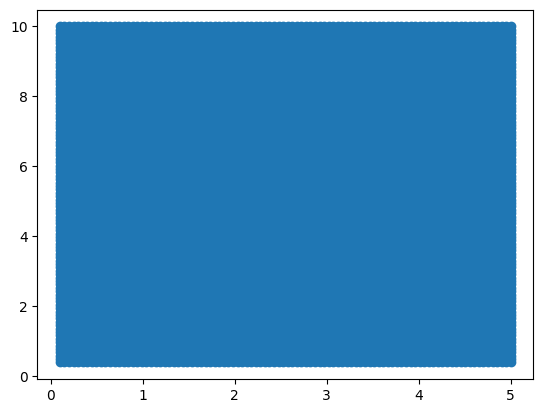

In [248]:
plt.figure()
plt.scatter(X, Y)
plt.show()

In [99]:
# reverse np ndarray
np.flip(x, 0)

array([3., 2., 1., 0.])

In [119]:
ax.get_xticks()

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.])

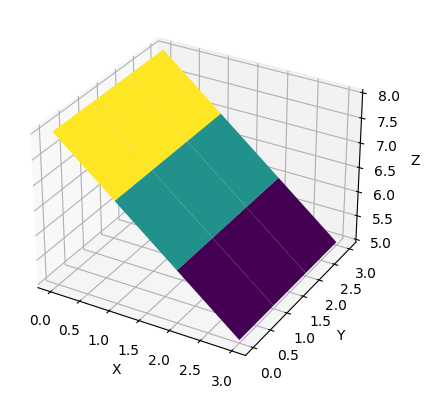

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Given data
data = np.array([[5., 6., 7., 8.],
                 [5., 6., 7., 8.],
                 [5., 6., 7., 8.],
                 [5., 6., 7., 8.]])

# Define x and y axes
x = np.linspace(0, data.shape[1]-1, data.shape[1])[::-1]  # Revert the order of x-axis values
y = np.linspace(0, data.shape[0]-1, data.shape[0])

# Create a meshgrid from x and y
X, Y = np.meshgrid(x, y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.plot_surface(X, Y, data, cmap='viridis')

# Set labels for x, y, and z axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


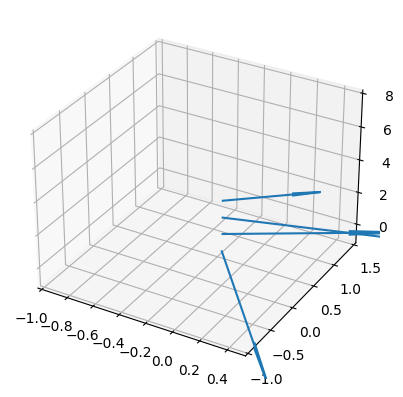